# Significant Level
a = 0.05

# Data
June 2016

In [25]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import json
import zipfile
import sys
import os

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [26]:
def getCitiData(date):
    import requests
    import zipfile
    import StringIO
    zip_file_url = "https://s3.amazonaws.com/tripdata/" + date + "-citibike-tripdata.zip"
    r = requests.get(zip_file_url, stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall()

In [27]:
datelist = '201606'
getCitiData(datelist) 


In [28]:
#Include all the data into a list    
list1 = []
temp = pd.read_csv(datelist + "-citibike-tripdata.csv")
list1.append(temp)

In [29]:
df = pd.DataFrame()
for i in list1:
    df= df.append(i, ignore_index=True)

In [30]:
df.head(10)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1
5,946,6/1/2016 00:01:01,6/1/2016 00:16:48,503,E 20 St & Park Ave,40.738274,-73.987520,495,W 47 St & 10 Ave,40.762699,-73.993012,25193,Subscriber,1974.0,1
6,2351,6/1/2016 00:01:05,6/1/2016 00:40:16,533,Broadway & W 39 St,40.752996,-73.987216,386,Centre St & Worth St,40.714948,-74.002345,19538,Subscriber,1986.0,1
7,773,6/1/2016 00:01:24,6/1/2016 00:14:18,492,W 33 St & 7 Ave,40.750200,-73.990931,483,E 12 St & 3 Ave,40.732233,-73.988900,17101,Subscriber,1986.0,1
8,1929,6/1/2016 00:01:27,6/1/2016 00:33:37,525,W 34 St & 11 Ave,40.755942,-74.002116,306,Cliff St & Fulton St,40.708235,-74.005301,17802,Subscriber,1968.0,1
9,725,6/1/2016 00:01:38,6/1/2016 00:13:43,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3083,Bushwick Ave & Powers St,40.712477,-73.941000,21421,Subscriber,1971.0,2


In [40]:
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18,43.0,NaN
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20,48.0,NaN
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21,26.0,NaN
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28,24.0,NaN
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53,26.0,NaN


In [41]:
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [42]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18,43.0,NaN
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20,48.0,NaN
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21,26.0,NaN
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28,24.0,NaN
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53,26.0,NaN


In [43]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.265112e+06,1.460318e+06,947425.000000,314575.000000
mean,9.897580e+02,9.562393e+02,4.073736e+01,-7.398694e+01,9.457872e+02,4.073696e+01,-7.398677e+01,2.051037e+04,1.977659e+03,1.079696e+00,37.743638,36.081971
std,7.589179e+03,1.101579e+03,2.277217e-02,1.641347e-02,1.093657e+03,7.874038e-02,1.378920e-01,3.454210e+03,1.157717e+01,5.872326e-01,11.606224,11.291810
min,6.100000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00,15.000000,15.000000
25%,4.050000e+02,3.280000e+02,4.072080e+01,-7.399906e+01,3.280000e+02,4.072066e+01,-7.399915e+01,1.748200e+04,NaN,1.000000e+00,NaN,NaN
50%,6.760000e+02,4.530000e+02,4.073818e+01,-7.398890e+01,4.500000e+02,4.073782e+01,-7.398890e+01,2.052900e+04,NaN,1.000000e+00,NaN,NaN
75%,1.143000e+03,5.300000e+02,4.075383e+01,-7.397769e+01,5.290000e+02,4.075300e+01,-7.397771e+01,2.362800e+04,NaN,1.000000e+00,NaN,NaN
max,3.129291e+06,3.260000e+03,4.078721e+01,-7.392989e+01,3.260000e+03,4.078721e+01,0.000000e+00,2.603700e+04,2.000000e+03,2.000000e+00,130.000000,128.000000


In [44]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

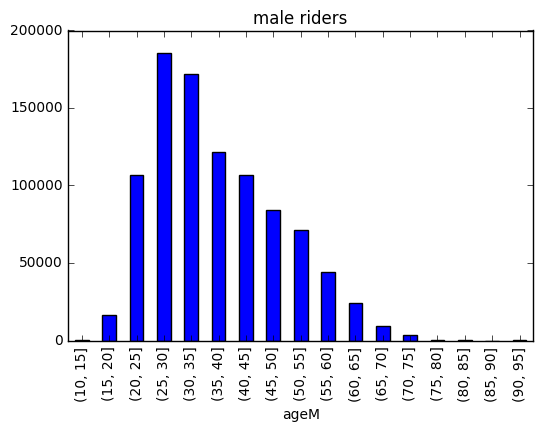

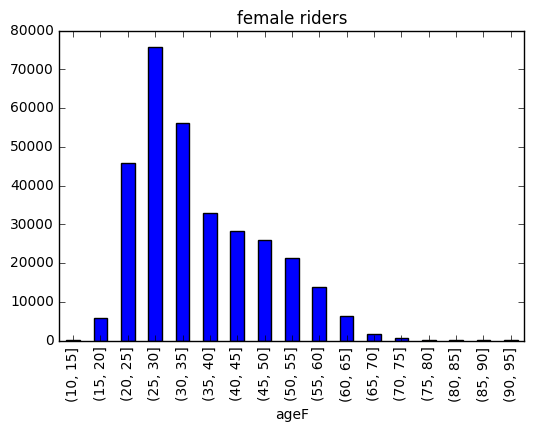

In [47]:
# plotting histograms with pandas is a bit different than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")

axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

### Figure 1: histogrammed distribution of riders' ages by gender
##### this is how the cumulative distributions look like. Notice that i am normalizing them! if i want to read an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000011
(15, 20]       0.001488
(20, 25]       0.034123
(25, 30]       0.078832
(30, 35]       0.075774
(35, 40]       0.051773
(40, 45]       0.028422
(45, 50]       0.021668
(50, 55]       0.014314
(55, 60]       0.011435
(60, 65]       0.005646
(65, 70]       0.001344
(70, 75]       0.000284
(75, 80]       0.000069
(80, 85]       0.000051
(85, 90]       0.000009
(90, 95]       0.000000


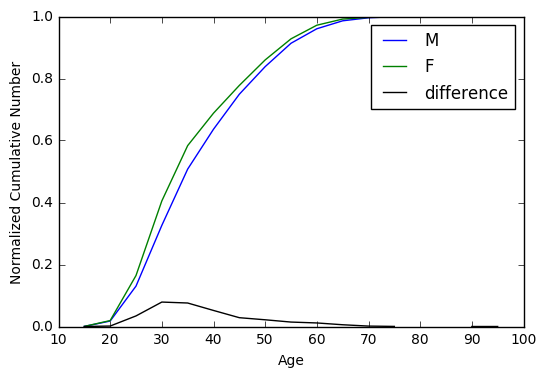

In [49]:

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")

pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## Figure 2: the cumulative distribution of CitiBike riders' ages by gender¶
#### They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated.
##### Notice that there may be NaN values you are gonna have to deal with! You can do that for example with a Boolean statementsuch as df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...lets run the scipy KS test

In [52]:
import scipy.stats

In [53]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.10835640729442816, pvalue=0.0)


In [57]:
n1 = len(df.ageM.dropna())
print (n1)

947425


In [58]:
n2 = len(df.ageF.dropna())
print (n2)

314575


In [59]:
np.sqrt((n1+n2)/(n1*n2))

0.0020577620550686552

### According to the KS table, the c(a) is 1.36 with the significance level of 0.05. Therefore, the ks statistic 0.1083 is larger than 1.36*0.0020, so the null hypothesis is rejected.


## Now redo the test with a subsample of the data: take only 1 ride every of 200

In [60]:
df_sub = df.sample(n=int(len(df)/200), random_state = 1)

In [63]:
ks_sub = scipy.stats.ks_2samp(df_sub.ageM.dropna(), df_sub.ageF.dropna())
print (ks_sub)

Ks_2sampResult(statistic=0.11942523736610952, pvalue=6.0713802820666969e-15)


### Similarly, the p value is less than 0.05, therefore the null hypothesis is rejected, so the age distribution has a difference between genders.


# Pearson's test for correlation

### $N_0$: There is no correlation between male and female's age distribution.
### $N_1$:  There is correlation between male and female's age distribution.

In [68]:
dff = df.ageF.dropna()
len(dff)


314575

In [70]:
dfm = df.ageM.dropna()

len(dfm)

947425

In [81]:
scipy.stats.pearsonr(x = dfm.sample(n = len(dff)).sort_values(), y = dff.sort_values())

(0.99575593939768903, 0.0)

### As you can see, the p value is 0.0 which is small so the null hypothesis is rejected. And the pearson value is 0.996 which claims a strong correlation.

## Spearman's test for correlation


In [82]:
##The same null nypothesis.
scipy.stats.spearmanr(a = dfm.sample(n = len(dff)).sort_values(), b = dff.sort_values())

SpearmanrResult(correlation=0.99904742556838111, pvalue=0.0)

### The p value is 0.0 which is small so the null hypothesis is rejected. And the spearman's value is 0.999 which claims a strong correlation.

### EXTRA CREDIT: CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES OF RIDERS DURING THE DAY VS DURING THE NIGHT!

In [83]:
df['age'] = 2015 - df['birth year']
